In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/4b/fb/2b6290436f0188d1f1d51c8076e32c9c50f24afa1c698430394eead3a890/yfinance-0.2.63-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/04/13/d9839089b900fa7b479cce495d62110cddc4bd5630a04d8469916c0e79c5/frozendict-2.4.6-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [14]:
# fetching last 60 days of apple stock (AAPL)
ticker = "AAPL"
data = yf.download(ticker, period='60d', interval='1d')
data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9016\4262364386.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='60d', interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-03-27,223.556839,224.695345,220.271139,221.100054,37094800
2025-03-28,217.614624,223.516888,217.394911,221.379691,39818600
2025-03-31,221.839096,225.324516,215.946814,216.725791,65299300
2025-04-01,222.897705,223.387054,218.613315,219.522127,36412700
2025-04-02,223.596786,224.895087,220.730550,221.030160,35905900


In [16]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700
2025-06-17,195.639999,198.389999,195.210007,197.199997,38856200
2025-06-18,196.580002,197.570007,195.070007,195.940002,45394700
2025-06-20,201.000000,201.699997,196.860001,198.240005,96813500
2025-06-23,201.500000,202.300003,198.960007,201.630005,55595500


In [47]:
data.shape

(60, 5)

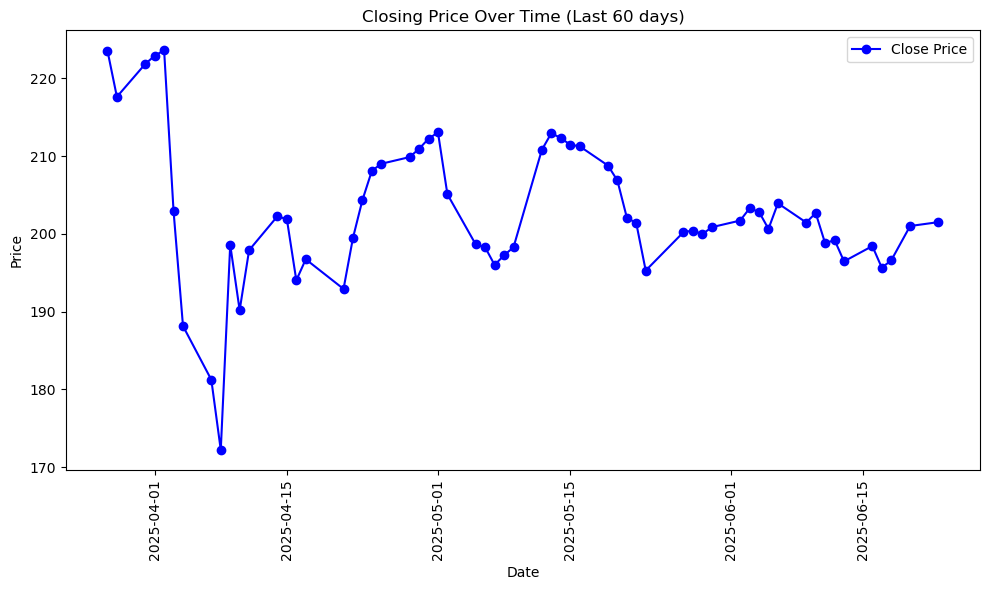

In [44]:
# plotting closing price over time
plt.figure(figsize=(10,6))
plt.plot(data['Close'],label='Close Price',color='Blue',marker='o')
plt.title("Closing Price Over Time (Last 60 days)")
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [57]:
# Calculate Daily Returns
data['Daily Returns'] = data['Close'].pct_change()

In [59]:
data.head(2)

Price,Close,High,Low,Open,Volume,Daily Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2025-03-27,223.556839,224.695345,220.271139,221.100054,37094800,NaN
2025-03-28,217.614624,223.516888,217.394911,221.379691,39818600,-0.02658


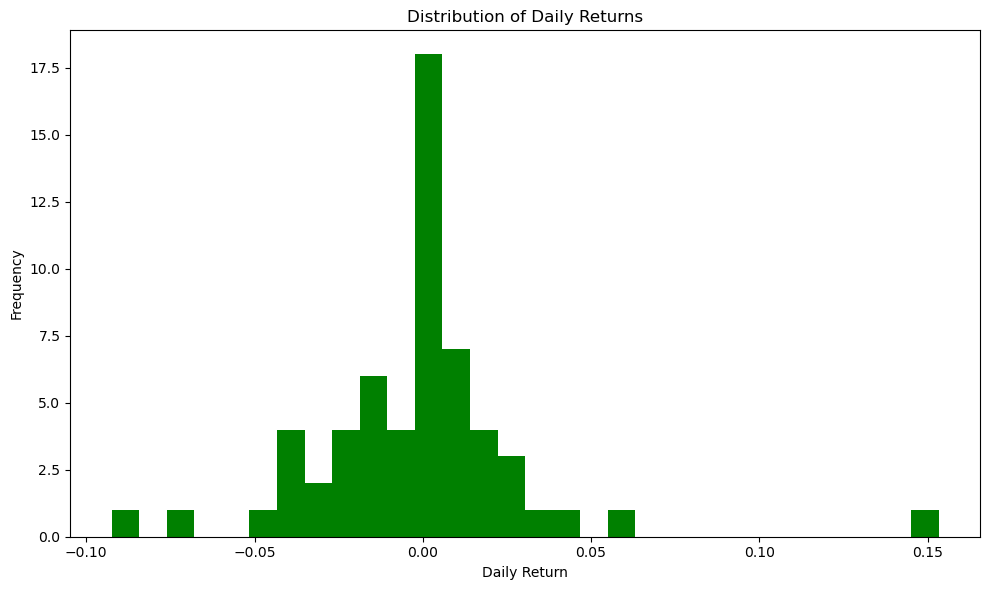

In [69]:
#plotting daily returns
plt.figure(figsize=(10,6))
plt.hist(data['Daily Returns'],bins=30,color='green')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [103]:
#Calculating moving averages
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()

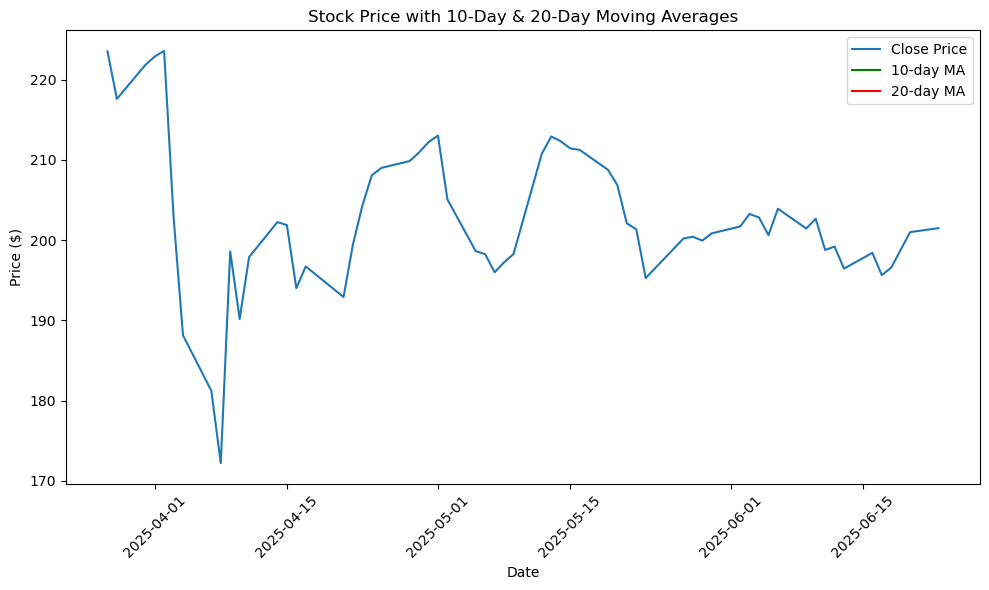

In [123]:
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA10'],label='10-day MA',color='green')
plt.plot(data['MA20'],label='20-day MA',color='red')
plt.legend()
plt.title("Stock Price with 10-Day & 20-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.tight_layout()

In [149]:
#Insights and observation

latest_close = data['Close'].iloc[-1]
max_close = data['Close'].max()
min_close = data['Close'].min()
print(f"Latest Close Price: ${latest_close.iloc[-1]:.2f}")
print(f"Max Close in 60 Days: ${max_close.iloc[-1]:.2f}")
print(f"Min Close in 60 Days: ${min_close.iloc[-1]:.2f}")

Latest Close Price: $201.50
Max Close in 60 Days: $223.60
Min Close in 60 Days: $172.19
